# EXPLORATORY DATA ANALYSIS: NEW YORK APARMENTS

In [192]:
# Importar Librerias
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

PREGUNTA DE INVESTIGACIÓN: Es posible usar un modelo de ML para predecir el precio de las viviendas?

PASO 0: Preparar base de datos 

In [193]:
# Obtener la info desde internet
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
# Crear una base de datos local con la info
con = sq.connect('ny_aparments.db')
total_data.to_sql('aparments', con, index=False, if_exists='replace')
con.commit()
con.close()


PASO 1: Análisis descriptivo 

In [194]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

conclusiones:
1. 48895 filas y 16 columnas (15 + target)
2. 10 columnas números y 6 columnas categóricas
3. columnas 12 y 13 tienen aprox. 10.000 entradas vacias

In [195]:
total_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [196]:
#revisar si existen duplicados
total_data.drop(["id","host_id"],axis=1).duplicated().sum()


0

No hay duplicados

In [197]:
# Eliminar información irrelevante
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


conclusiones: se decide que las siguientes columnas son irrelevantes para el cálculo de precio:

"id", "name", "host_id", "host_name", "neighbourhood", "number_of_reviews", "last_reviews", "reviews_per_month","calculated_host_listings_count"

ademas, se borran los registros que tengan valor 0 por considerarlos error (solamente son 11 registros)

In [198]:
clean_total_data = total_data.drop(["id", "name", "host_id", "host_name", "neighbourhood", 
                                    "number_of_reviews", "last_review", "reviews_per_month",
                                    "calculated_host_listings_count"], axis= 1)

clean_total_data = clean_total_data[clean_total_data['price'] != 0]

clean_total_data 

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,2


después de borrar las filas innecesarias, no existen valores NaN que deban eliminarse

PASO 2: Analisis univariante

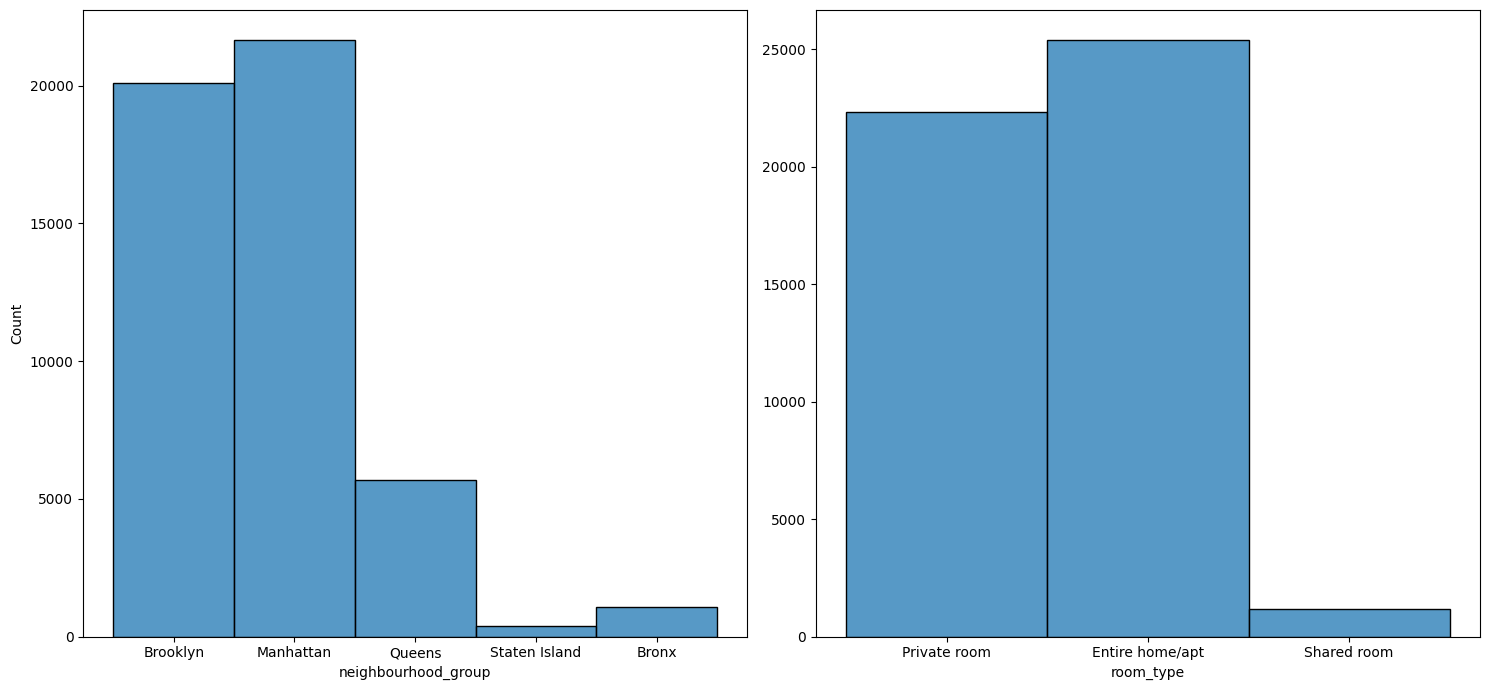

In [199]:
#Análisis de variables categóricas

fig, axis = plt.subplots(1, 2, figsize = (15, 7))
# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)
# Adjust the layout
plt.tight_layout()
plt.show()

Conclusion: 
1. la mayor parte de los alojamientos están en Brookliyn y Manhattan.
Queens tiene un 0.25 de los registros y Bronx y Staten Island apenas tienen oferta.
2. La mayor parte de los apartamentos son casas enteras (25.000 registros). Luego se encuentran habitaciones privadas (23.000 registros). Finalmente hay un mínimo de habitaciones conjuntas.

In [200]:
clean_total_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48884 non-null  object 
 1   latitude             48884 non-null  float64
 2   longitude            48884 non-null  float64
 3   room_type            48884 non-null  object 
 4   price                48884 non-null  int64  
 5   minimum_nights       48884 non-null  int64  
 6   availability_365     48884 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


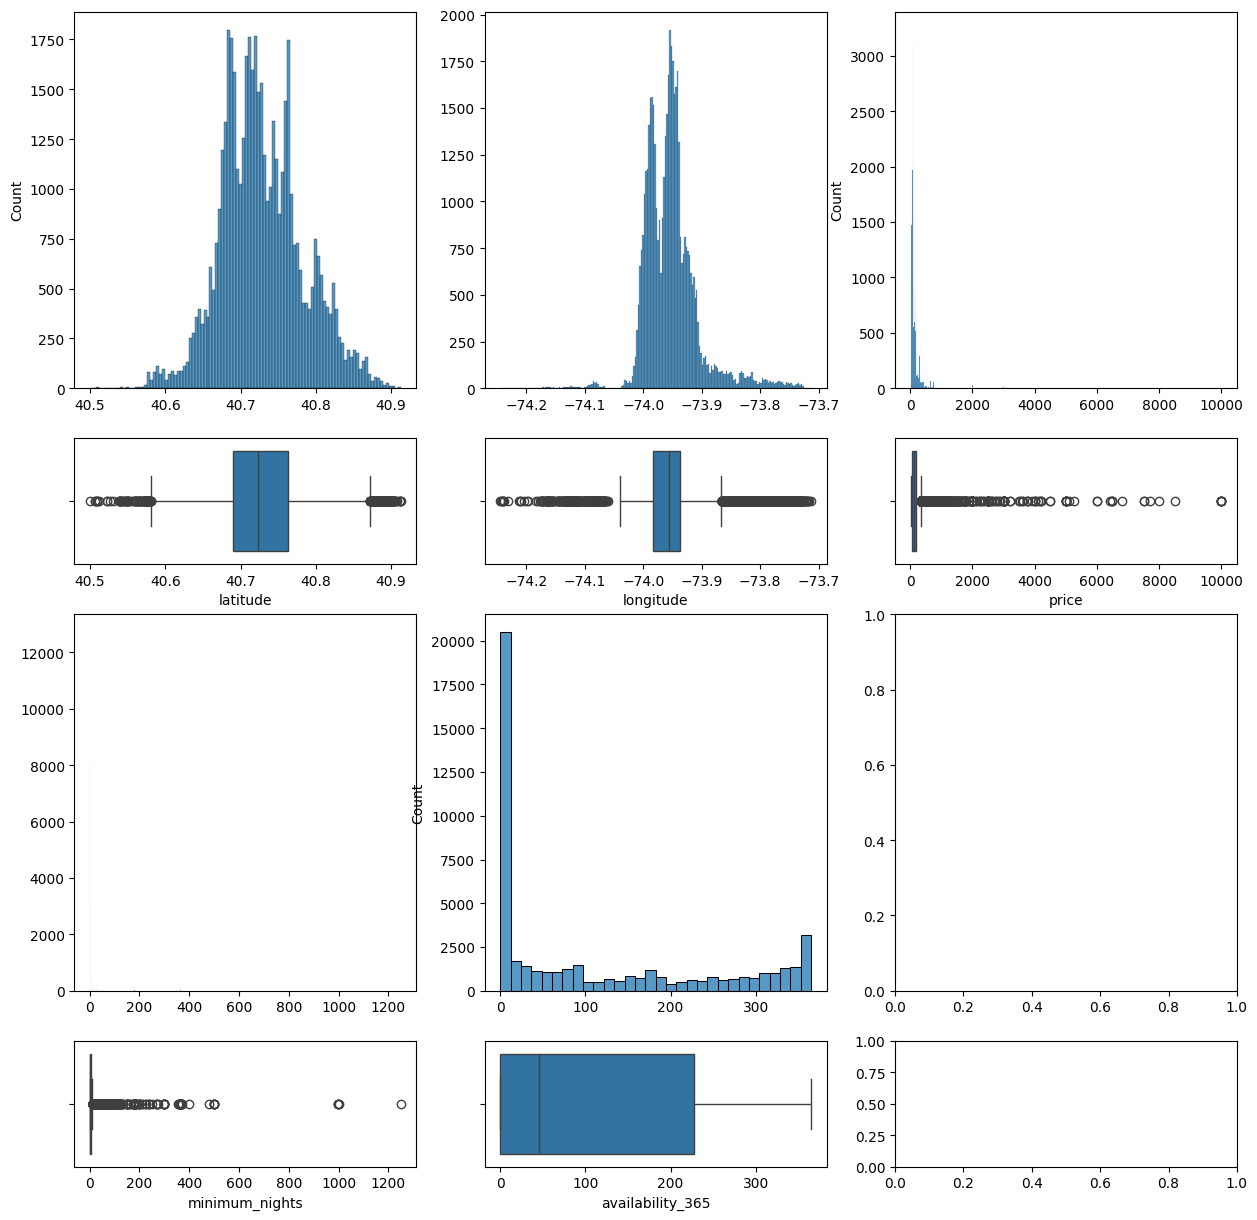

In [201]:
# Graficar las variables numéricas

fig, axis = plt.subplots(4, 3, figsize=(15, 15), gridspec_kw={'height_ratios': [3, 1, 3, 1]})
sns.histplot(ax=axis[0, 0], data=clean_total_data, x="latitude").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=clean_total_data, x="latitude")
sns.histplot(ax=axis[0, 1], data=clean_total_data, x="longitude").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=clean_total_data, x="longitude")
sns.histplot(ax=axis[0, 2], data=clean_total_data, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=clean_total_data, x="price")
sns.histplot(ax=axis[2, 0], data=clean_total_data, x="minimum_nights").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=clean_total_data, x="minimum_nights")
sns.histplot(ax=axis[2, 1], data=clean_total_data, x="availability_365").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=clean_total_data, x="availability_365")
plt.show()


PASO 3: Análisis multivariante

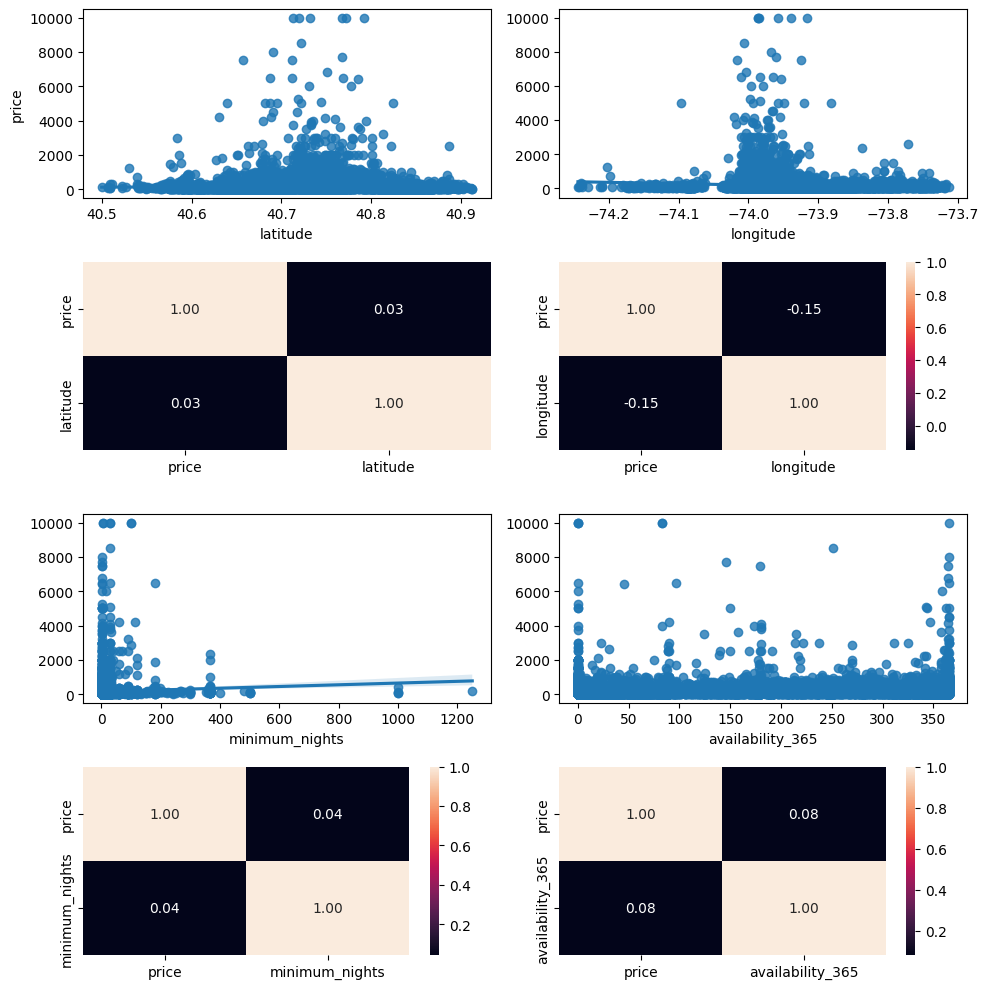

In [202]:
# Análisis multivariante numérico - numérico

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(4, 2, figsize = (10, 10))
sns.regplot(ax = axis[0, 0], data=clean_total_data, x = "latitude", y = "price")
sns.heatmap(clean_total_data[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data=clean_total_data, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(clean_total_data[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data=clean_total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(clean_total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data=clean_total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(clean_total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
plt.tight_layout()
plt.show()

En este caso, la variable target es numérica y no categórica, por lo que no es factible realizar un análisis categórico categórico.
factorizamos las variables categóricas y realizamos un análisis numerico numerico

In [203]:
# Análisis multivariante numérico - numérico
#Creamos una nueva columna y le asignamos una factorización con pandas
clean_total_data['neighbourhood_group_n'] = pd.factorize(clean_total_data['neighbourhood_group'])[0] 
clean_total_data['room_type_n'] = pd.factorize(clean_total_data['room_type'])[0]


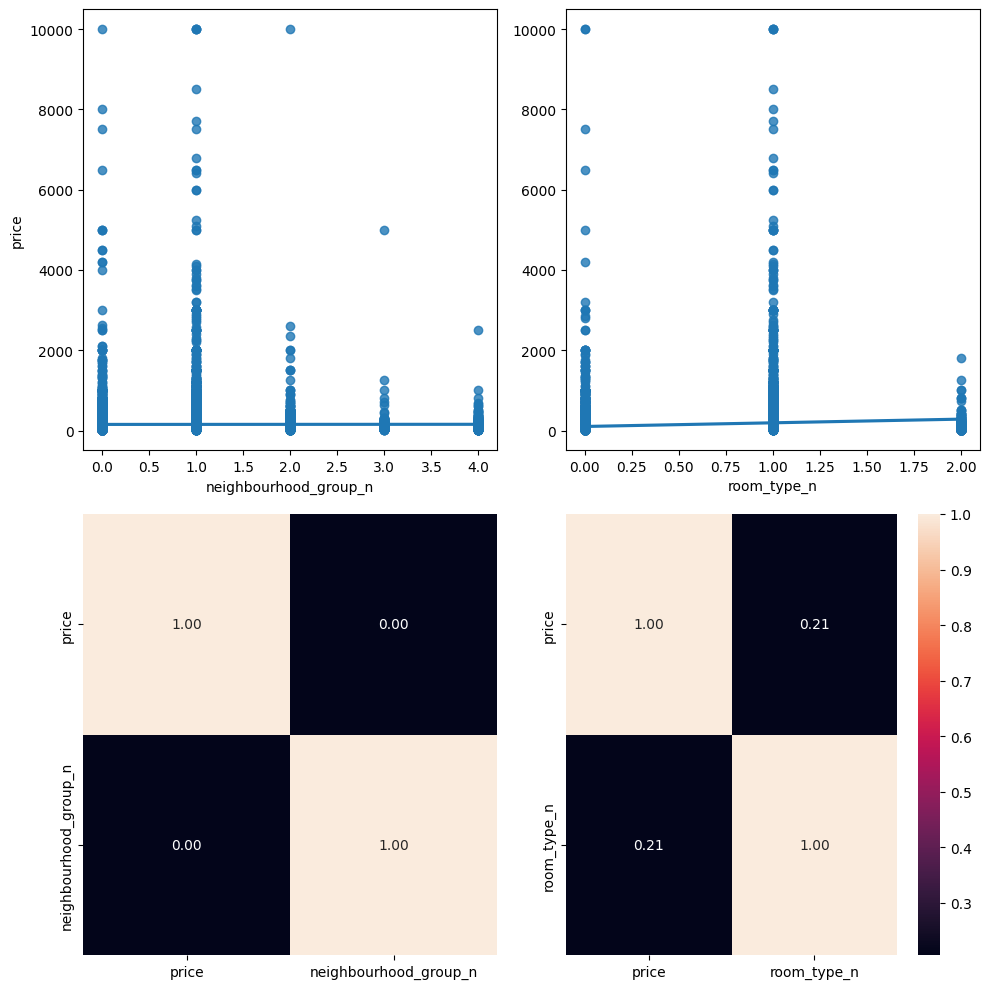

In [204]:
# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize = (10, 10))
sns.regplot(ax = axis[0, 0], data=clean_total_data, x = "neighbourhood_group_n", y = "price")
sns.heatmap(clean_total_data[["price", "neighbourhood_group_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data=clean_total_data, x = "room_type_n", y = "price").set(ylabel=None)
sns.heatmap(clean_total_data[["price", "room_type_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
plt.tight_layout()
plt.show()

El análisis N-N permite observar que la variable "room_type_n" (tipo de habitación) presenta una relación relativamente alta con el precio del alojamiento.

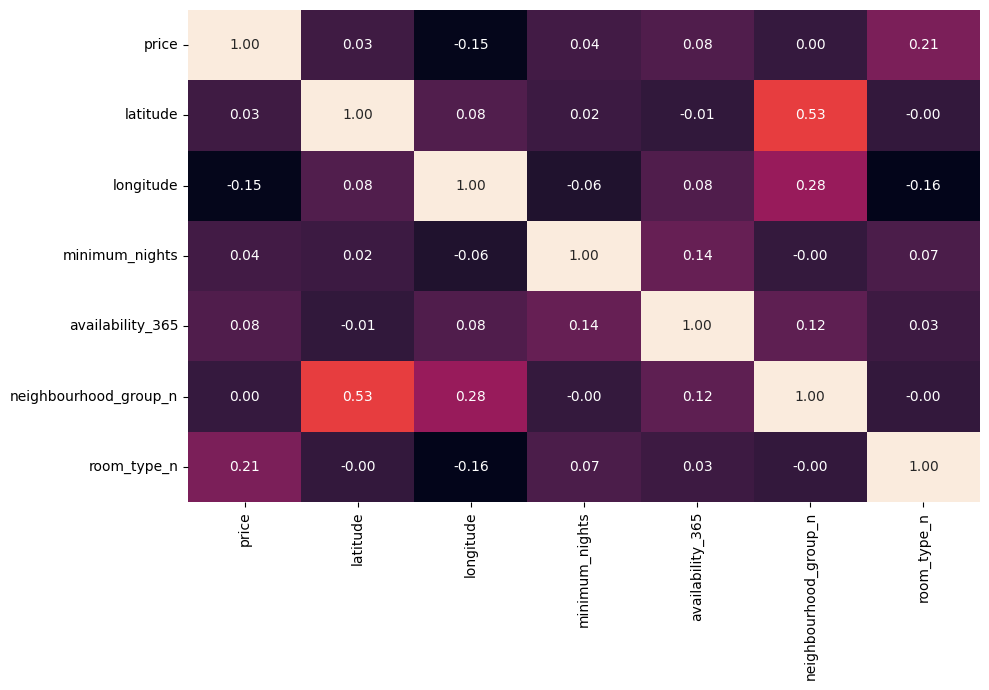

In [205]:
# Análisis de correlación
heatmap_list = ['price','latitude','longitude','minimum_nights','availability_365','neighbourhood_group_n','room_type_n']

fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(clean_total_data[heatmap_list].corr(), annot = True, fmt = ".2f", cbar = False)
plt.tight_layout()
plt.show()


Conclusiones: En general no existen variables con gran influencia. Las mayores son tipo de habitación. longitud y disponibilidad anual

La longitud influye en el tipo de habitación

El mínimo de noches influye en la disponibilidad anual y el tipo de habitación 


PASO 4: Ingeniería de características

    4.1. Análisis de outliers

In [206]:
# Revisión de outliers
clean_total_data.describe()

,latitude,longitude,price,minimum_nights,availability_365,neighbourhood_group_n,room_type_n
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,112.779498,0.786986,0.567118
std,0.054532,0.046159,240.170260,20.512224,131.627271,0.844288,0.541183
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983080,69.000000,1.000000,0.000000,0.000000,0.000000
50%,40.723080,-73.955685,106.000000,3.000000,45.000000,1.000000,1.000000
75%,40.763120,-73.936290,175.000000,5.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,365.000000,4.000000,2.000000


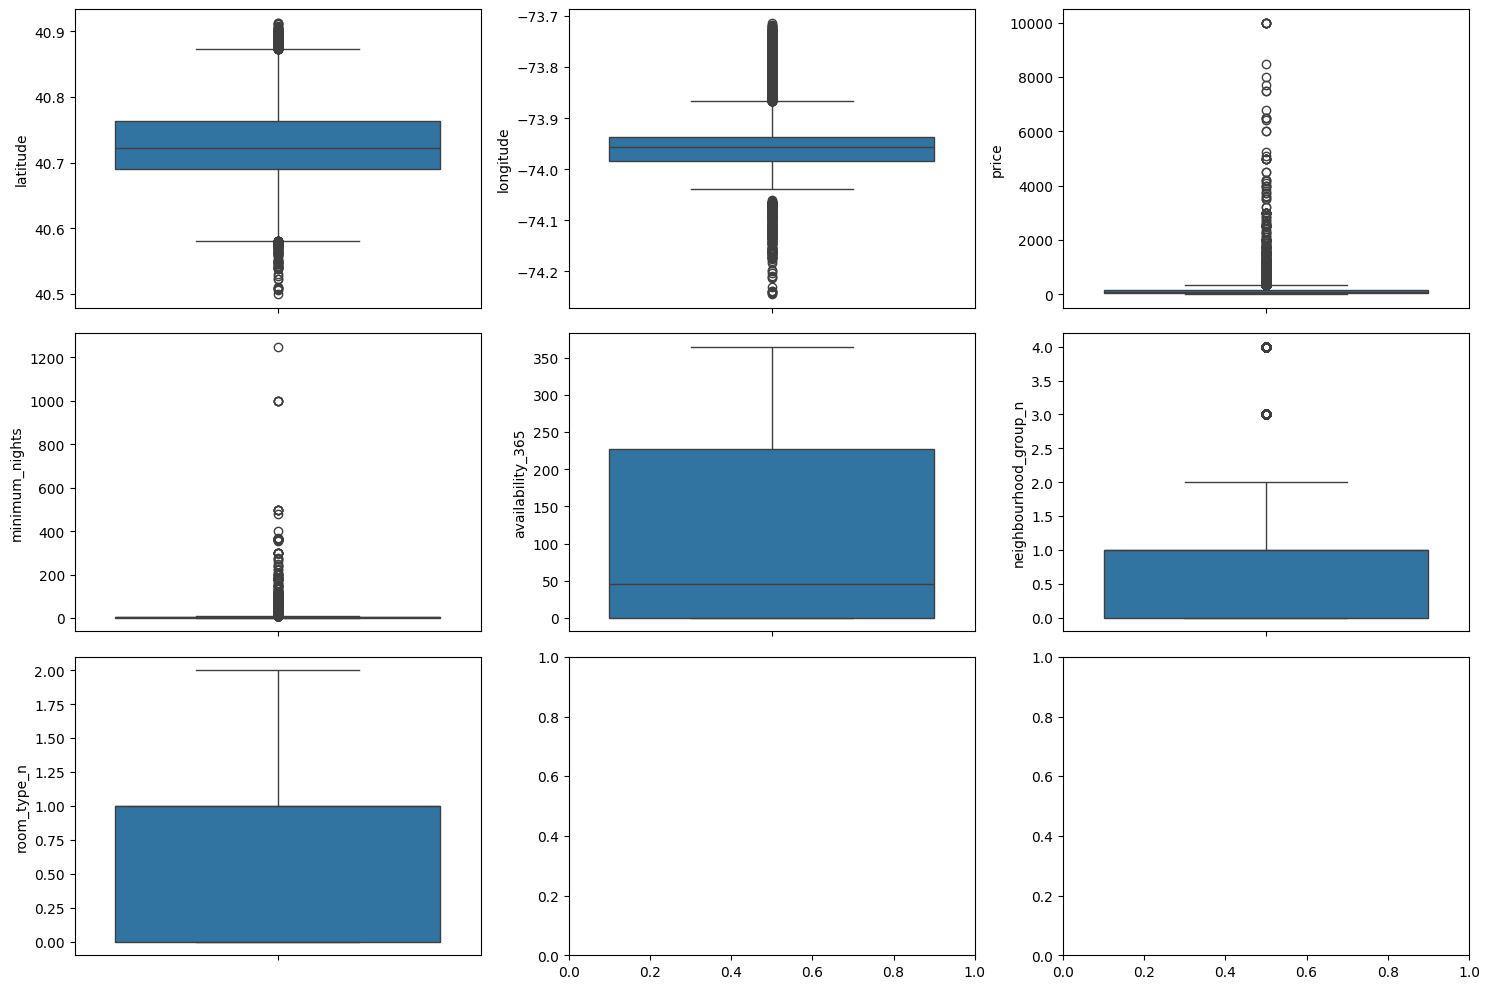

In [207]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = clean_total_data, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = clean_total_data, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = clean_total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = clean_total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = clean_total_data, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = clean_total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[2, 0], data = clean_total_data, y = "room_type_n")

plt.tight_layout()

plt.show()

A partir de la observación de las medidas de tendencia central y dispersión, los resultados son los siguientes:

- Existen outliers en las columnas 'latitude' (latitud), 'longitude' (longitud),'price'(precio), 'minimum_nights'(noches mínimas) y 'neighbourhood_group_n' (barrio)

- Los grupos 'latitude', 'longitude' y 'neighbourhood_group_n' se desechan como outliers por su correlación lógica con los resultados esperados.

- 'price'(precio) y 'minimum_nights'(noches mínimas) serán revisados.


A partir de 28 noches existen 5048 (10.33%) registros
A partir de 29 noches existen 4845 (9.91%) registros
A partir de 30 noches existen 4505 (9.22%) registros
A partir de 31 noches existen 747 (1.53%) registros
A partir de 32 noches existen 546 (1.12%) registros
A partir de 33 noches existen 538 (1.10%) registros
A partir de 34 noches existen 536 (1.10%) registros
A partir de 35 noches existen 536 (1.10%) registros
A partir de 36 noches existen 521 (1.07%) registros
A partir de 37 noches existen 520 (1.06%) registros


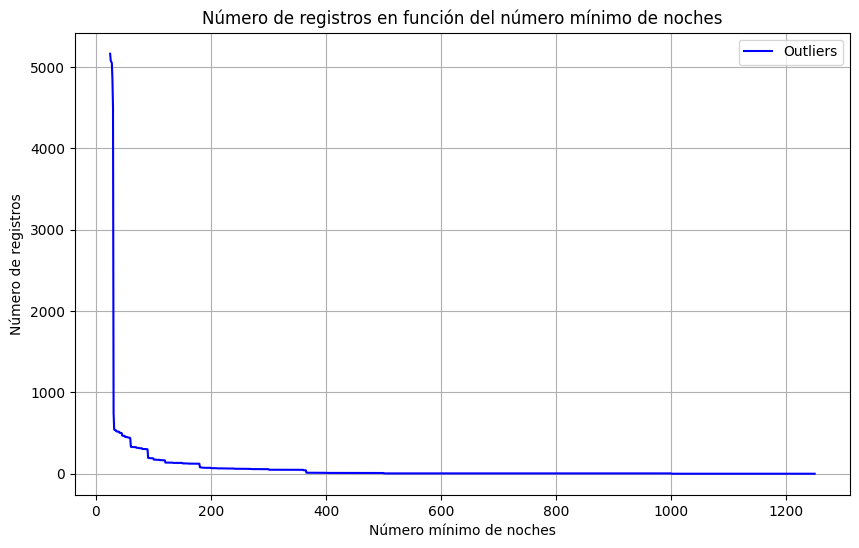

In [208]:
# OUTLIERS MINIMUM_NIGHTS
outlier_min_nights = [(clean_total_data['minimum_nights'] >= x).sum() for x in range(28,38)]
aux = 27
for x in outlier_min_nights:
    aux += 1
    print(f"A partir de {aux} noches existen {x} ({x*100/len(clean_total_data):.2f}%) registros")

# GRÁFICO DE OUTLIERS
nights_range = range(25, 1250)
outliers = [(clean_total_data['minimum_nights'] >= night).sum() for night in nights_range]
plt.figure(figsize=(10, 6))
plt.plot(nights_range, outliers, linestyle='-', color='b', label='registros')
plt.xlabel('Número mínimo de noches')
plt.ylabel('Número de registros')
plt.title('Número de registros en función del número mínimo de noches')
plt.grid(True)
plt.legend()
plt.show()

Según la página de airbnb, no existe un limite de mínimo de noches para airbnbs en Ney York. En consecuencia, se decidirá una cantidad que no afecte estadísticamente al dataset. A partir de un análisis que brinda los registros existentes en función del mínimo de noches fue posible observar lo siguiente:

A partir de las 31 noches, el % de registros es 1.53% del dataset. No obstante, a partir de las 30 noches (un mes), el porcentaje aumenta ampliamente hasta 9.22% del dataset.

Se decide tomar 31 como el número a partir del cual consideramos los resultados como outliers (747 registros)


In [211]:
clean_total_data = clean_total_data[clean_total_data['minimum_nights'] <= 30]
clean_total_data.shape

(48137, 9)

A partir de 960 USD hay 316 (0.66%) registros
A partir de 970 USD hay 302 (0.63%) registros
A partir de 980 USD hay 302 (0.63%) registros
A partir de 990 USD hay 297 (0.62%) registros
A partir de 1000 USD hay 294 (0.61%) registros
A partir de 1010 USD hay 270 (0.56%) registros
A partir de 1020 USD hay 213 (0.44%) registros
A partir de 1030 USD hay 213 (0.44%) registros
A partir de 1040 USD hay 212 (0.44%) registros
A partir de 1050 USD hay 212 (0.44%) registros


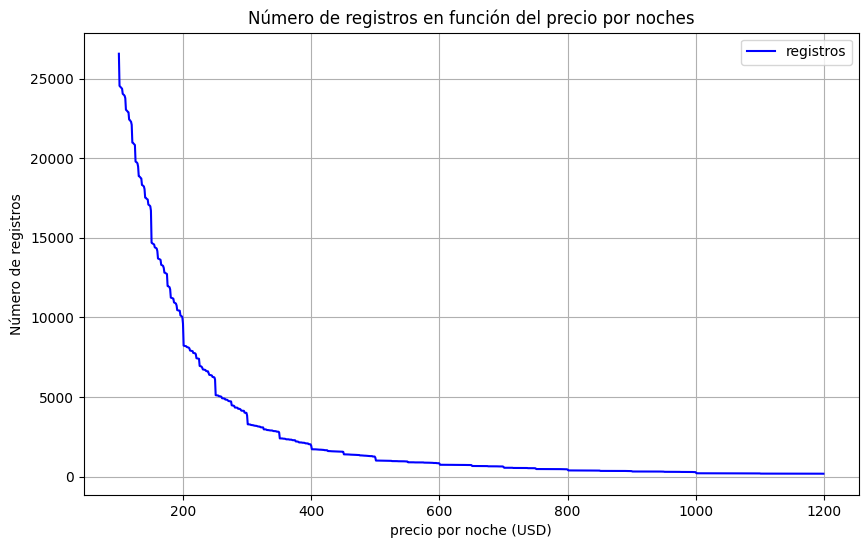

In [230]:
# OUTLIERS PRICE
outlier_price = [(clean_total_data['price'] >= x).sum() for x in range(950,1050,10)]
aux = 950
for x in outlier_price:
    aux += 10
    print(f"A partir de {aux} USD hay {x} ({x*100/len(clean_total_data):.2f}%) registros")

# GRÁFICO DE OUTLIERS
price_range = range(100, 1200)
outliers = [(clean_total_data['price'] >= price).sum() for price in price_range]
plt.figure(figsize=(10, 6))
plt.plot(price_range, outliers, linestyle='-', color='b', label='registros')
plt.xlabel('precio por noche (USD)')
plt.ylabel('Número de registros')
plt.title('Número de registros en función del precio por noches')
plt.grid(True)
plt.legend()
plt.show()

Al igual que con el mínimo de noches, no existe un criterio de AIRBNB, por lo que los outliers se deben calcular manualmente. Se realiza el mismo análisis, y el resultado es el siguiente:

La curva de precio no es igual que la de mínimo de noches (aplican otros factores). Y considerando que es la variable target del dataset, no deberían quitarse registros. No obstante, dado que no se realizará un modelo de machine learning, es posible recortar registros.

El criterio elegido es recortar aquellos registros con precio mayor a 1000 USD x noche.

In [231]:
clean_total_data = clean_total_data[clean_total_data['price'] <= 1000]
clean_total_data.shape

(47924, 9)

In [233]:
clean_total_data.describe()

,latitude,longitude,price,minimum_nights,availability_365,neighbourhood_group_n,room_type_n
count,47924.000000,47924.000000,47924.000000,47924.000000,47924.000000,47924.000000,47924.000000
mean,40.728830,-73.951881,141.314832,5.576016,111.434146,0.786537,0.563476
std,0.054591,0.046301,116.865661,8.195583,131.065255,0.846851,0.541766
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,0.000000
25%,40.689940,-73.982850,69.000000,1.000000,0.000000,0.000000,0.000000
50%,40.722870,-73.955515,105.000000,2.000000,43.000000,1.000000,1.000000
75%,40.763053,-73.935857,175.000000,5.000000,223.000000,1.000000,1.000000
max,40.913060,-73.712990,1000.000000,30.000000,365.000000,4.000000,2.000000
